<a href="https://colab.research.google.com/github/ChuquEmeka/Titanic-Survivor-Prediction/blob/main/Titanic_Second_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Titanic Competition Presented By Edeh Emeka N. (Second Submission)


#### **The Challenge**
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [ ]:
titanic_train = pd.read_csv("titanic_train_dataset.csv")
titanic_test = pd.read_csv("titanic_test_dataset.csv")
test_ids = titanic_test["PassengerId"]

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA (Understanding the given train dataset)

In [ ]:
titanic_train.shape
#to briefly see the number of rows and columns in my train dataset

(891, 12)

In [ ]:
#i will further get the frquency or count of the survivors to non survivors
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

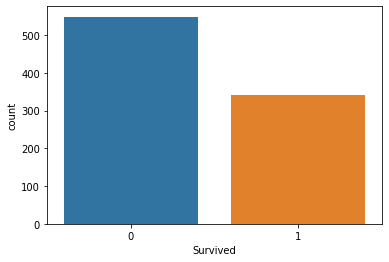

In [ ]:
#i can plot the above outcome using the seaborn library
sns.countplot(x = "Survived", data = titanic_train)

**From the above plot, 549 passangers of the train dataset died while 342 passangers survived**

In [ ]:
#similarly, i will determine the number of passangers in each class and also plot my result
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

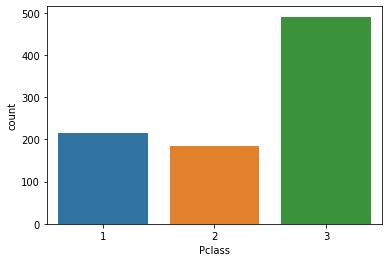

In [ ]:
sns.countplot(x = "Pclass", data = titanic_train)

**From the above barplot, we have majority of the passangers(491) in the 3rd class**

In [ ]:
#Determining the number of males and females in the train dataset
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

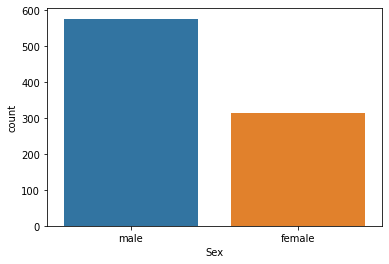

In [ ]:
sns.countplot(x = "Sex", data = titanic_train)

**We have 577 males and 314 females in the train dataset**

<AxesSubplot:xlabel='Age', ylabel='Count'>

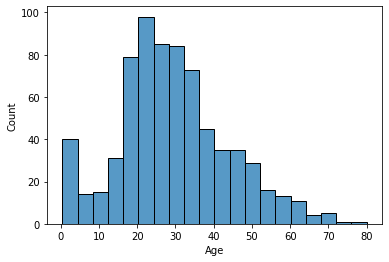

In [ ]:
#To check for the age distribution, i will use a histogram since i am considering the "Age" variable which is a continues data
sns.histplot(x = "Age", data = titanic_train)

**From the above distribution, majority of the passangers are betweent the ages of 20 and 35.**

## Data Wrangling/Cleaning

I will be dropping columns that i believe wouldn't be detaminants of if a passanger survived or not.  
the PassangerId, Ticket, Cabin and Name columns will be dropped while the missing values in the age, SibSp, Parch and Fare will be replaced with their respective column averages. The missing values in the "Embarked" column will be replaced with "U" which stands for unkown. This cleaning will be done on both datasets.

In [ ]:
#I will create a data cleaning function
def clean_data(titanic_train):
    titanic_train= titanic_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1)
    
    columns = ['SibSp', 'Parch', 'Fare', 'Age']
    for col in columns:
        titanic_train[col].fillna(titanic_train[col].mean(), inplace=True)
    
    titanic_train.Embarked.fillna('U', inplace=True)
    return titanic_train

clean_train = clean_data(titanic_train)
clean_test = clean_data(titanic_test)
    

In [ ]:
clean_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Checking for null values
clean_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Next, i will need to convert the categorical columns like "Sex" and "Embarked" into numeric variables by using Sklearn Label Encorder.**

In [ ]:
from sklearn import preprocessing
labEn = preprocessing.LabelEncoder()

columns = ["Sex", "Embarked"]

for col in columns:
    clean_train[col] = labEn.fit_transform(clean_train[col])
    clean_test[col] = labEn.transform(clean_test[col])
    print(labEn.classes_)
    
clean_train.head()
    


['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


From the above mapping in "Sex" column, "female" has be converted to zero and "male" is 1. Similarly in the "Embarked" column, "C" is now zero, "Q" is 1, "S" is 2 and "U" is 3.

## Predictive Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y=clean_train["Survived"]
X=clean_train.drop(["Survived"], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2)


In [ ]:
cls = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [ ]:
predictions = cls.predict(X_val)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val, predictions)*100
print(str(round(acc)) + '%')

79%


In [ ]:
submission_prediction = cls.predict(clean_test)
submission_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#I will now convert the submission into a dataframe.
df = pd.DataFrame({"PassengerId":test_ids.values,
                      "Survived":submission_prediction})

In [ ]:
df.to_csv("titanic_second_submission2.csv", index = False)

In [ ]:
df

## My Kaggle submission scored 77% accuracy score as aginst the 79% scored above. 